# Tugas 1 (Tambahan)

4. Dengan menggunakan dataset dibawah ini, https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction
(https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction)
5. Jelaskan apa tujuan penggunaan dataset ini?
6. Definisikan atribut yang menjadi input dan output nya?
7. Silahkan membuat model klasifikasi logistic reg, knn, DT, dan RF untuk kasus dataset diatas!
8. Buatlah tabel yang menjelaskan performa dari model machine learning untuk kasus dataset diatas! Kolom pertama "model",
kolom selanjutnya "accuracy, precision, recall".
9. Jelaskan dari hasil experimen diatas, model mana yang paling baik? Jelaskan alasan anda!

4. sudah saya download dataset nya.
5. Tujuan penggunaan dataset ini adalah untuk memprediksi status pinjaman, apakah akan di approve atau tidak.

In [1]:
import pandas as pd

df = pd.read_csv('loan_data.csv')

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


attribute input:
- Gender : jenis kelamin peminjam
- Married : status pernikahan peminjam
- Dependents : jumlah tanggungan peminjam
- Education : tingkat pendidikan peminjam
- Self_Employed : status pekerjaan peminjam misalnya wiraswasta atau tidak
- ApplicantIncome : pendapatan peminjam
- CoapplicantIncome : pendapatan co-peminjam misalnya pasangan
- LoanAmount : jumlah pinjaman
- Loan_Amount_Term : jangka waktu pinjaman dalam bulan
- Credit_History : riwayat kredit peminjam 
- Property_Area : lokasi properti peminjam

attribute output:
- Loan_Status : status pinjaman, Y = approved, N = not approved

In [2]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


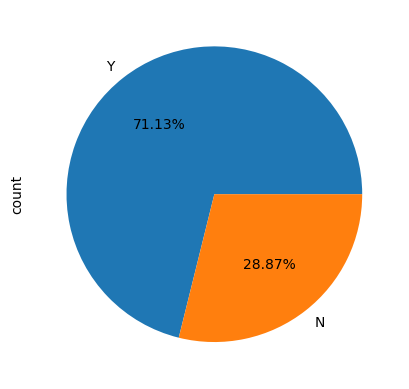

In [4]:
import matplotlib.pyplot as plt

data = df['Loan_Status'].value_counts()
data.plot(kind='pie', autopct='%.2f%%')
plt.show()

dari diagram diatas dapa dilihat bahwa dataset tidak seimbang antara yang load approved dan tidak approved, terlihat dari jumlah data yang lebih banyak pada loan approved dengan status Y.

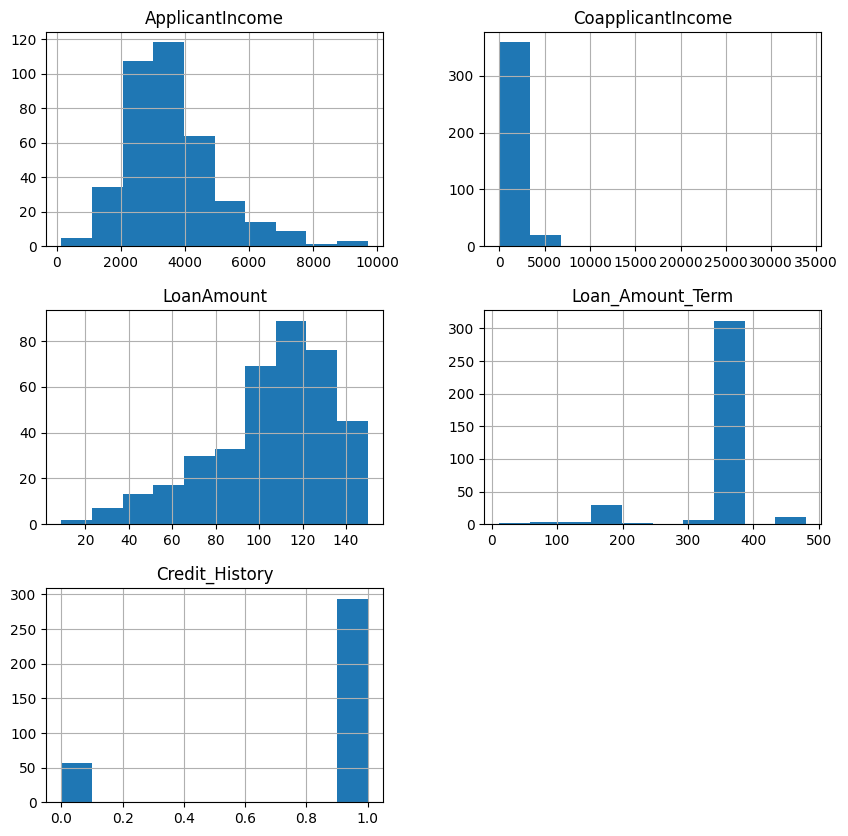

In [5]:
df.hist(figsize=(10, 10))
plt.show()

In [6]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# inputation untuk handling missing value
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0]) # mengisi missing value dengan modus
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0]) # mengisi missing value dengan modus
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0]) # mengisi missing value dengan modus
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0]).astype(int) # mengisi missing value dengan modus
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0]).astype(int) # mengisi missing value dengan modus

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df = df.drop(['Loan_ID'], axis=1)

In [11]:
# convert data kategorikal menjadi numerik
def c_to_n(df, c):
    for i in c:
        unique_value = df[i].unique()
        df[i].replace(unique_value, [0, 1], inplace=True)
    for i in ['Property_Area']:
        unique_value = df[i].unique()
        df[i].replace(unique_value, [0, 1, 2], inplace=True)
c = ['Gender', 'Married', 'Education', 'Education','Self_Employed', 'Loan_Status']
c_to_n(df, c)        
        

/tmp/ipykernel_12704/2823386360.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace(unique_value, [0, 1], inplace=True)
/tmp/ipykernel_12704/2823386360.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i].replace(unique_value, [0, 1], inplace=True)
/tmp/ipykernel_12704/2823386360.

In [15]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,4583,1508.0,128.0,360,1,0,0
1,0,0,0,0,1,3000,0.0,66.0,360,1,1,1
2,0,0,0,1,0,2583,2358.0,120.0,360,1,1,1
3,0,1,0,0,0,6000,0.0,141.0,360,1,1,1
4,0,0,0,1,0,2333,1516.0,95.0,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,0,0,3+,0,0,5703,0.0,128.0,360,1,1,1
377,0,0,0,0,0,3232,1950.0,108.0,360,1,0,1
378,1,1,0,0,0,2900,0.0,71.0,360,1,0,1
379,0,0,3+,0,0,4106,0.0,40.0,180,1,0,1


NameError: name 'c_variables' is not defined

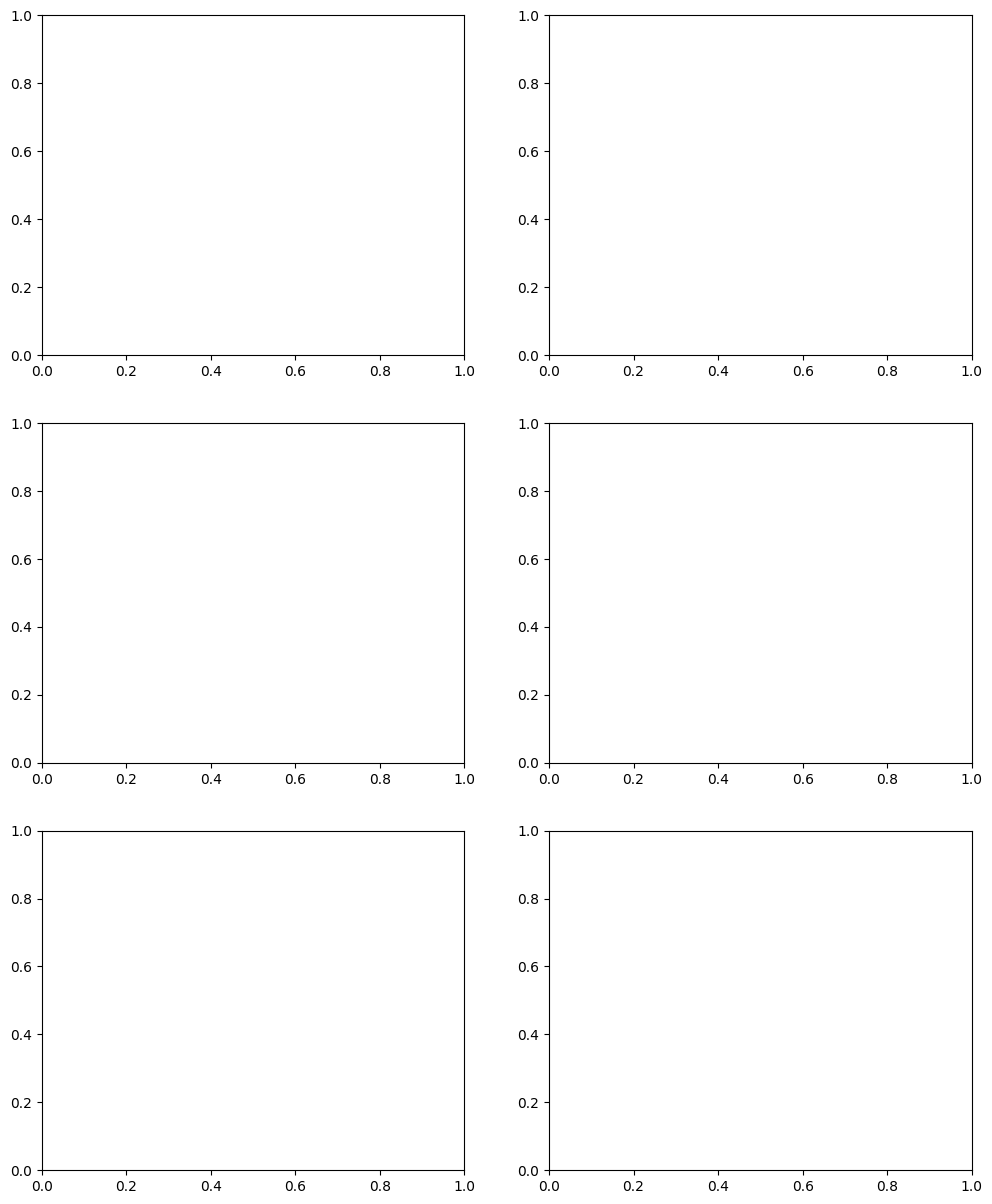

In [21]:
# visualisasi persebaran data kategorikal yang sudah diubah menjadi numerik
fig, ax = plt.subplots(3, 2, figsize=(12,15))

for index, cat_col in enumerate(c_variables):
    row, col = index//2, index%2
    # using matplotlib to draw the count plot
    plt.subplot(ax[row, col])

plt.subplots_adjust(hspace=1)